In [43]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [44]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./유방암.csv", encoding = 'euc=kr')

# 인공신경망

유방암 결과를 분류하는 신경망 모델을 만들고 predict method를 이용하여
목표변수 범주를 예측하라. 

그리고 모델의 정확도와 confusion matrix를 구하라.

#### 데이터 구성하기

In [4]:
def diag(x):
    if x == "음성":
        return 0
    else:
        return 1

In [5]:
# diagnosis열이 '음성', '양성' 을 정수에 대입시켜 변환시켜준다
df_raw['diagnosis'] = df_raw['diagnosis'].apply(diag)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [6]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis",axis = 1, inplace = False)

#데이터는 (train(0.6) : test(0.4))의 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train dzta X size : {}".format(df_train_x.shape))
print("train dzta Y size : {}".format(df_train_y.shape))
print("test dzta X size : {}".format(df_test_x.shape))
print("test dzta Y size : {}".format(df_test_y.shape))

train dzta X size : (192, 30)
train dzta Y size : (192,)
test dzta X size : (128, 30)
test dzta Y size : (128,)


#### MLPClassifier 모델 생성
- 기본 옵션으로 모델 생성

In [7]:
nn_uncustomized = MLPClassifier(random_state=1234)

# hidden_layer_sizes = (100,100) 변경 (은닉층 2개, 각 은닉층 노드 100개)
nn_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.599
Score on test set: 0.758


#### MLPClassifier 모델 Parameter 변경
##### Hidden Layer : 은닉층 변경에 따른 모델 성능
은닉충 노드 개수를 지정한다 은닉층이 복잡할수록 과대적합 경향성이 나타난다.

In [8]:
train_accuracy = []
test_accuracy = []

# 은닉충 노드 : 5~100
para_hidden = [5 * hidden for hidden in range(1,21)]

print(para_hidden)

for v_hidden in para_hidden:
    #nn = nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=1234) 은닉층 1D
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state=1234) #은닉층 2D
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.599,0.758
1,10,0.594,0.750
2,15,0.401,0.242
3,20,0.901,0.875
4,25,0.870,0.898
5,30,0.599,0.758
6,35,0.932,0.914
7,40,0.599,0.758
8,45,0.938,0.938
9,50,0.932,0.906


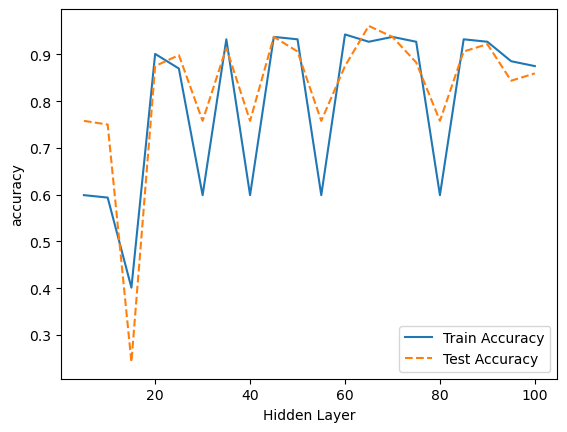

In [9]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()
plt.show()

##### Activation : 활성화 함수에 따른 모델 성능


In [10]:
train_accuracy = []
test_accuracy = []

# activation 변경
para_function = ['logistic','tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state=1234) #은닉층 2D
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_function= pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.943,0.898
1,tanh,0.943,0.906
2,relu,0.599,0.758


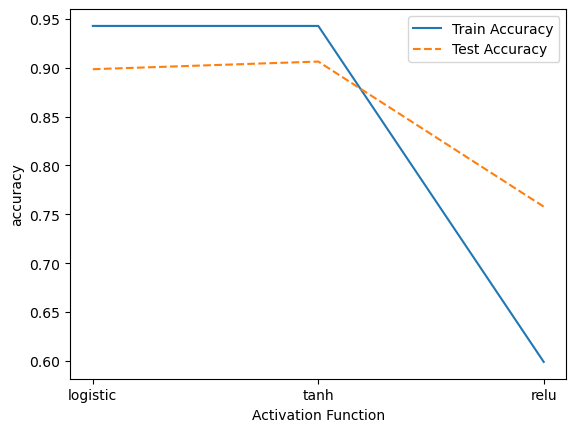

In [12]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("Activation Function")
plt.legend()
plt.show()

#### Scale 변환
- Standardscaler : 설명변수 scale 변경

In [13]:
# 변수명 저장
v_feature_name = df_train_x.columns

# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [14]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


#### scale 조절 후 MLPClassifier 모델 재실행
- scale이 조정된 데이터로 새로운 모델 생성

In [15]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.953


#### 새로운 MLPClassifier 모델 Parameter 변경
- Hidden Layer : 은닉층 변경에 따른 모델 성능

In [16]:
train_accuracy = []
test_accuracy = []

# 은닉충 노드 : 5~100
para_hidden = [5 * hidden for hidden in range(1,21)]

print(para_hidden)

for v_hidden in para_hidden:
    #nn = nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=1234) 은닉층 1D
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state=1234) #은닉층 2D
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.953,0.891
1,10,0.984,0.938
2,15,0.984,0.922
3,20,0.984,0.945
4,25,0.995,0.961
5,30,1.000,0.953
6,35,0.995,0.945
7,40,1.000,0.938
8,45,1.000,0.953
9,50,1.000,0.945


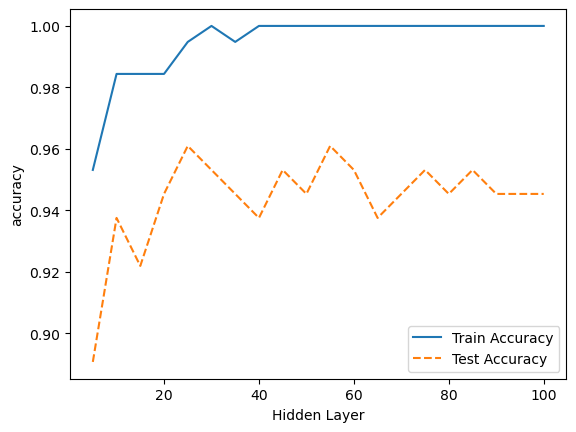

In [17]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()
plt.show()

- Activation : 활성화 함수에 따른 모델 성능

In [18]:
train_accuracy = []
test_accuracy = []

# activation 변경
para_function = ['logistic','tanh', 'relu']

for v_function in para_function:
    # nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60), random_state=1234) 으로 변경가능
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,80), random_state=1234) 
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_function= pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.995,0.938
1,tanh,1.000,0.953
2,relu,1.000,0.945


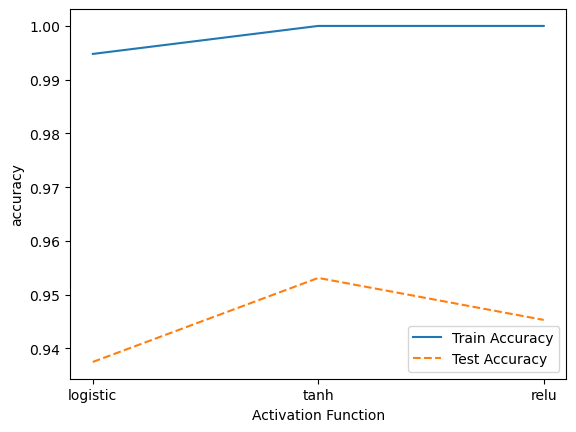

In [20]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("Activation Function")
plt.legend()
plt.show()

In [21]:
# Activation Function 지정(임의)
activation ='relu'

- Solver : 가중치 최적화 변경에 따른 모델 성능

In [23]:
train_accuracy = []
test_accuracy = []

# solver 변경
para_solver = ['lbfgs','sgd','adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = 'relu', hidden_layer_sizes = (80,80), random_state=1234) 
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.945
1,sgd,0.964,0.883
2,adam,1.000,0.945


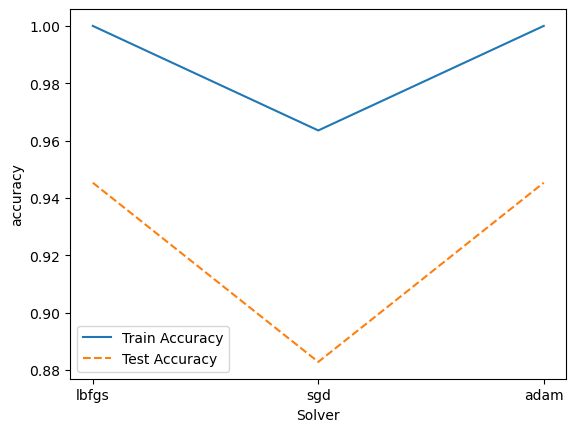

In [24]:
# 모델 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("Solver")
plt.legend()
plt.show()

- Mini Batch 변경에 따른 모델 성능

In [25]:
train_accuracy = []
test_accuracy = []

# Mini batch 변경, 20~180
para_batch = [20 * batch for batch in range(1,10)]

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = 'adam', activation = 'relu', hidden_layer_sizes = (80,80), random_state=1234) 
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

# Solver별 정확도 테이블
df_accuracy_batch.round(3)

[20, 40, 60, 80, 100, 120, 140, 160, 180]


,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.945
1,40,1.0,0.938
2,60,1.0,0.938
3,80,1.0,0.945
4,100,1.0,0.938
5,120,1.0,0.938
6,140,1.0,0.938
7,160,1.0,0.945
8,180,1.0,0.938


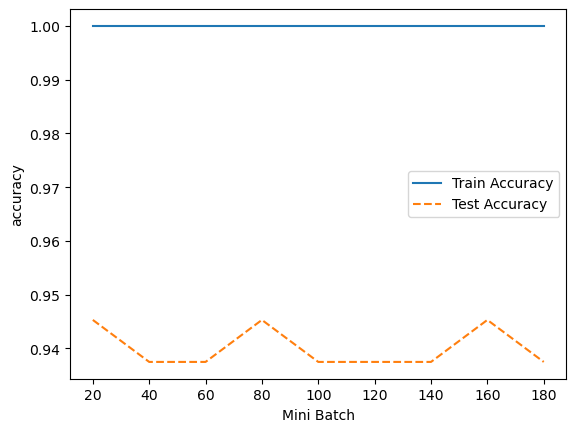

In [26]:
# 모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("Mini Batch")
plt.legend()
plt.show()

#### 결론 도출

In [28]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(80,80), activation='relu', solver='adam',batch_size=100, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix : \n".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 f1 score로 모델평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.953
Confusion matrix : 

              precision    recall  f1-score   support

           0      1.000     0.918     0.957        97
           1      0.795     1.000     0.886        31

    accuracy                          0.938       128
   macro avg      0.897     0.959     0.921       128
weighted avg      0.950     0.938     0.940       128



f1score는 정밀도(precision)과 재현율(recall)의 조화평균(harmonic mean)이다

f1score = 2 * (precision * recall) / (precision + recall) = 0.844 ==> 0.886

정밀도는 올바르게 분류된 양성 예측(True Positive)/ 전체 양성 예측(True Positive + False Positive) 입니다. 이는 모델이 얼마나 정확한 값을 예측하는지를 파악하는 지표입니다.

precision = TP / (TP + FP) = 0.818 ==> 0.795

재현율은 실제 양성인 샘플 중 모델이 얼마나 양성 클래스를 잘 분류하는지를 나타내는 지표입니다.

recall = TP / (TP + FN) = 0.871 ==>1.000

fscore는 정밀도와 재현율의 조화 평균이지만, 가중치를 반영하여 계산된다. 따라서 정밀도와 재현율이 모두 높을 때 최대값을 가진다.

fscore는 가중치를 조정할 수 있기 때문에 일반적으로, 데이터가 불균형하게 분포되어 있는 경우에는 fscore를 사용하는 것이 더 나은 결과를 가져올 수 있다.

fscroe의 weighted avg는 0.923 ==>> 0.94로 서포트벡터머신보다 좀 더 개선된 모델이라고 할 수 있다.

특히 유방암 데이터의 경우 recall값이 가장 중요한데 recall값이 가장 유의미하게 상승하였고 기존에 배운 모델 중에서 가장 좋은 성능을 보인다.


-----------

# KNN

#### 거리 기반으로 이웃을 결정하며 새로운 사건이 발생했을 때 가장 근접한 k-이웃의 값을 평균해서 예측하거나 빈도가 많은 클래스로 분류하는 탐색적 기법

Q. 유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도
(accuracy)의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을
구해라. 그리고 실제값과의 정확도와 confusion matrix를 구해라.

In [98]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

#### 데이터 구성하기

In [99]:
df_raw = pd.read_csv("유방암.csv", encoding = 'euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [100]:
def diag(x):
    if x == "음성":
        return 0
    else:
        return 1

In [101]:
# diagnosis열이 '음성', '양성' 을 정수에 대입시켜 변환시켜준다
df_raw['diagnosis'] = df_raw['diagnosis'].apply(diag)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [102]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis",axis = 1, inplace = False)

#데이터는 (train(0.6) : test(0.4))의 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


#### 모델 생성 - 기본 옵션으로 모델 생성

In [103]:
knn_uncustomized = KNeighborsClassifier()

# hidden_layer_sizes = (100,100) 변경 (은닉층 2개, 각 은닉층 노드 100개)
knn_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f75bcf8be20>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Score on training set: 0.932
Score on test set: 0.914


+ 실행옵션확인

In [104]:
print(knn_uncustomized.get_params().keys())
print(knn_uncustomized.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


- 이웃 수 증가에 따른 정확도 변화

In [115]:
train_accuracy = []
test_accuracy = []

# 최대 이웃 수 :3~30
para_n_neighbors = [i for i in range(3,30)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors) 
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors= pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

df_accuracy_neighbors.round(3)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7590838280>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7598fd5b40>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f75bcf8ae60>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7598fd5b40>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f75bd12d870>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f75bcf8ae60>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.932,0.898
1,4,0.911,0.891
2,5,0.932,0.914
3,6,0.927,0.914
4,7,0.927,0.898
5,8,0.922,0.914
6,9,0.911,0.906
7,10,0.911,0.906
8,11,0.917,0.906
9,12,0.917,0.906


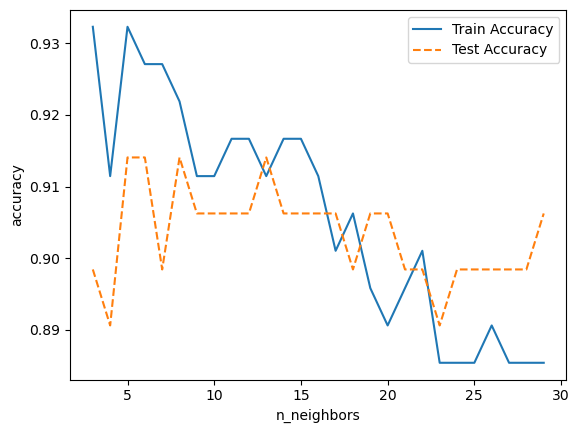

In [106]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

최대 이웃 수를 3~30으로 바꿔가며 fit해본 결과 최대 이웃수가 5일 때 가장 좋은 성능을 보이는 것을 확인할 수 있었다.

n_neighbors가 작으면 과대적합의 위험이 증가하고

n_neighbors가 크면 반대로 과소적합될 가능성이 증가한다.

위 그래프를 보면 실제로 n_neighbors가 3보다 작을 때 과대적합하는 것을 확인할 수 있고 15가 넘어가면서 감소하는 추세를 보인다.

#### 가중치별 이웃 수 증가에 따른 정확도 변화

In [107]:
train_accuracy = []
test_accuracy = []

# 최대 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2

# 가중치(uniform, distance)
para_n_weights = (['uniform']) * 10 + (['distance'] * 10)

# zip(list1, list2,...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop : n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop : n_neighbors = para_n_neighbors[1], weights = para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

    
df_accuracy_weights= pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_n_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

df_accuracy_weights.round(3)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7598fd5b40>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f75bcf8b520>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f75bcf8b520>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f75bd06f760>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.898
1,2,uniform,0.938,0.914
2,3,uniform,0.932,0.898
3,4,uniform,0.911,0.891
4,5,uniform,0.932,0.914
5,6,uniform,0.927,0.914
6,7,uniform,0.927,0.898
7,8,uniform,0.922,0.914
8,9,uniform,0.911,0.906
9,10,uniform,0.911,0.906


In [108]:
# 결과 확인을 위한 데이터 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights', values = ['TrainAccuracy','TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.898438  0.898438
2                   1.0  0.937500     0.898438  0.914062
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.911458     0.898438  0.890625
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.914062
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.921875     0.906250  0.914062
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.911458     0.929688  0.906250

In [109]:
# pivot을 이용할 경우, columns와 value이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 +'_'+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.898438,0.898438
2,1.0,0.937500,0.898438,0.914062
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.911458,0.898438,0.890625
5,1.0,0.932292,0.914062,0.914062


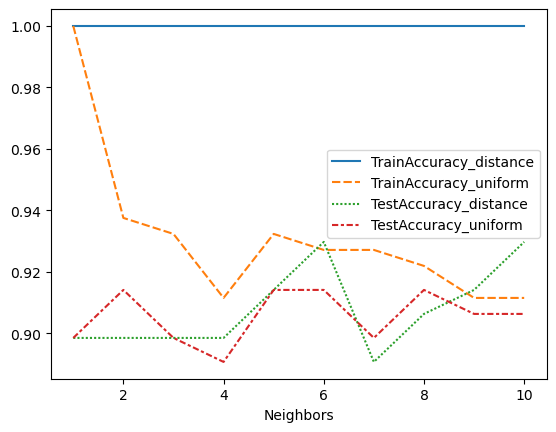

In [110]:
import seaborn as sns
# 그래프 생성, 변수별 linestyle구분
sns.lineplot(data = df_accuracy_weights_pivot)
plt.show(sns)

In [111]:
# 임의로 저장
weights = 'uniform'

* 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [116]:
train_accuracy = []
test_accuracy = []

# 최대 이웃 수
para_n_neighbors = [i for i in range(3,30)] * 2

# 거리 계산 방법 (euclidiean, manhattan)
para_n_metric = ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

    
df_accuracy_metric= pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_n_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy

df_accuracy_metric.round(3)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7590415630>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f75bd12d870>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7590415ab0>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7590415ab0>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

ValueError: Length of values (20) does not match length of index (54)

In [ ]:
# 결과 확인을 위한 데이터 변환
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric", 
                                                    values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 +'_'+level1
sns.lineplot(data=df_accuracy_metric_pivot)
plt.show(sns)

#### 결론도출

In [117]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform', metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

# train 모델 정확도
print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))

# test 모델 정확도
print("test data accuracy: {0:.3f}".format(knn_model.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix : \n".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 f1 score로 모델평가
print(classification_report(df_test_y, y_pred, digits=3))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f759044b130>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

train data accuracy: 0.911
test data accuracy: 0.891
Confusion matrix : 

              precision    recall  f1-score   support

           0      0.911     0.948     0.929        97
           1      0.815     0.710     0.759        31

    accuracy                          0.891       128
   macro avg      0.863     0.829     0.844       128
weighted avg      0.888     0.891     0.888       128



f1score는 정밀도(precision)과 재현율(recall)의 조화평균(harmonic mean)이다

f1score = 2 * (precision * recall) / (precision + recall) = 0.886 => 0.891

정밀도는 올바르게 분류된 양성 예측(True Positive)/ 전체 양성 예측(True Positive + False Positive) 입니다. 이는 모델이 얼마나 정확한 값을 예측하는지를 파악하는 지표다.

precision = TP / (TP + FP) = 0.795 => 0.815

재현율은 실제 양성인 샘플 중 모델이 얼마나 양성 클래스를 잘 분류하는지를 나타내는 지표다.

recall = TP / (TP + FN) = 1.000 => 0.710

fscore는 정밀도와 재현율의 조화 평균이지만, 가중치를 반영하여 계산된다. 따라서 정밀도와 재현율이 모두 높을 때 최대값을 가진다.

fscore는 가중치를 조정할 수 있기 때문에 일반적으로, 데이터가 불균형하게 분포되어 있는 경우에는 fscore를 사용하는 것이 더 나은 결과를 가져올 수 있다.

fscroe의 weighted avg는 0.94 ==> 0.888 로 인공신경망보다 좀 더 좋지 않은 모델이라고 할 수 있다.

특히 유방암 데이터의 경우 recall값이 가장 중요한데 recall값이 가장 유의미하게 떨어졌기 때문에 

실제 이 모델을 유방암 판단 기존에 사용하기에는 어려울 것이라는 생각이 들었다. .
